# Analysing the "Adverse Weather Scenarios for Future Electricity Systems" dataset, as part of the CIReN project.

## Petros Zantis
## May - July 2023

<font size="4">

* In this notebook, the user can select many events within the dataset which fall under the desired classification *(extremity, global warming level etc.)*
    
    
* The chosen events are then compared via the use of **Box plots**, which are a nice way to summarise sets of data. The wind speeds and surface temperatures are averaged over the Polish wind farms, to highlight the effect over Poland. 
    
    * This was chosen since we run our power flow (cascade) simulations on the *case2736sp* MATPOWER model, which represents the Polish power network at the summer of 2004
    * The user can specify any other set of locations as a dictionary (see the Polish_Wind_Farms one) and basically repeat the same data analysis
    
    
* Time series for **surface temperature**, **wind speed** and **converted power generation** are then plotted for each event. The worst wind drought and hottest days are indicated in the plots. In addition, a power generation histogram is shown, indicating the percentage of each bin of power generation over all Polish wind farms *(for example, notice how the first bin is always the largest, which corresponds to the least wind power generation!)*
</font>


In [144]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from myClasses import *

from netCDF4 import Dataset
from IPython.display import HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 15

%matplotlib inline

In [145]:
'''Data repository from CEDA'''

#dataset_loc = '.\\dap.ceda.ac.uk\\badc\\deposited2021\\adverse_met_scenarios_electricity\\data\\long_duration'

''' *** Change this string to your local dataset folder location *** '''

dataset_loc = 'C:\\Users\\pz61\\Box\\CIReN_Shared\\Task 2a - climate impacts\\Data'

# Details of the event of interest
event_type = 'summer_wind_drought'
location = 'europe'
extremity = ['return_period_1_in_2_years', 'return_period_1_in_5_years', 'return_period_1_in_10_years', 
 'return_period_1_in_20_years', 'return_period_1_in_50_years', 'return_period_1_in_100_years' , 'most_extreme_events', '*']
duration_severity = ['duration' , 'severity']
global_warming_level = ['gwl4degC', 'gwl3degC', 'gwl2degC', 'gwl12-4degC', 'gwl12-2degC', '*']
event_no = ['*', 'event1', 'event2', 'event3']

event_type = 'summer_wind_drought'
location = 'europe'
extremity = '*'
duration_severity = 'severity'
global_warming_level = '*'
event_no = 'event1'

def select_events(event_type, location, extremity, duration_severity, global_warming_level, event_no):
    '''A function to interactively select the event of interest from the complete database'''
    
    file_str = dataset_loc
    if extremity == 'most_extreme_events' : global_warming_level =''
    details = [event_type, location, extremity, duration_severity, global_warming_level, event_no]
    for det in details:
        file_str = os.path.join(file_str, det).replace(os.sep, '\\')
    print("\nThe selected events are: {}".format(file_str))
    return os.path.join(file_str, '*.nc').replace(os.sep, '\\')

file_str = select_events(event_type, location, extremity, duration_severity, global_warming_level, event_no)


The selected events are: C:\Users\pz61\Box\CIReN_Shared\Task 2a - climate impacts\Data\summer_wind_drought\europe\*\severity\*\event1


In [146]:

print(file_str)

C:\Users\pz61\Box\CIReN_Shared\Task 2a - climate impacts\Data\summer_wind_drought\europe\*\severity\*\event1\*.nc


In [147]:
def create_events(file_str):
    '''A function to create Event instances for the imported events and add them in the Event_list 

        file_str (str) : the desired event file location
    '''
    
    print("Creating events:")
    Event_list = []
    try:
        filelist = glob.glob(file_str)
        
        for file in filelist:
            details = file.split('\\')[7:-1]               

            if len(Event_list)==0 or [*Event_list[-1].get_event_details().values()] != details:
                print(*details)
                Event_list.append(Event(*details))
            else:
                print("Not added again, it's the same event!")
                
    except IndexError as i: # or FileNotFoundError as f: 
        print(str(i))
        print("The file you asked for does not exist. Try checking the directory.")
        
    if len(Event_list)==0:
        print('No events match the requirements - try different parameters.')
               
    return Event_list
        
Events_list_unordered = create_events(file_str)

Creating events:
summer_wind_drought europe return_period_1_in_100_years severity gwl12degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_100_years severity gwl15degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_100_years severity gwl2degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_100_years severity gwl3degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_100_years severity gwl4degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_10_years severity gwl12degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_perio

In [148]:
extr_order = [2, 5, 10, 20, 50, 100]
gwl_order = [1.2, 1.5, 2, 3, 4]
Events_list = []

for extr in extr_order:    
    string = "return_period_1_in_" + str(extr) + "_years"
    for event in Events_list_unordered:
        if(event.extremity == string):
            Events_list.append(event)

for e in Events_list:
    print(e.extremity, e.global_warming_level)

return_period_1_in_2_years gwl12degC
return_period_1_in_2_years gwl15degC
return_period_1_in_2_years gwl2degC
return_period_1_in_2_years gwl3degC
return_period_1_in_2_years gwl4degC
return_period_1_in_5_years gwl12degC
return_period_1_in_5_years gwl15degC
return_period_1_in_5_years gwl2degC
return_period_1_in_5_years gwl3degC
return_period_1_in_5_years gwl4degC
return_period_1_in_10_years gwl12degC
return_period_1_in_10_years gwl15degC
return_period_1_in_10_years gwl2degC
return_period_1_in_10_years gwl3degC
return_period_1_in_10_years gwl4degC
return_period_1_in_20_years gwl12degC
return_period_1_in_20_years gwl15degC
return_period_1_in_20_years gwl2degC
return_period_1_in_20_years gwl3degC
return_period_1_in_20_years gwl4degC
return_period_1_in_50_years gwl12degC
return_period_1_in_50_years gwl15degC
return_period_1_in_50_years gwl2degC
return_period_1_in_50_years gwl3degC
return_period_1_in_50_years gwl4degC
return_period_1_in_100_years gwl12degC
return_period_1_in_100_years gwl15de

In [149]:
def open_files(event_list, print_checks = False):
    '''A function to open the datasets from the .nc files and extract the quantities of interest, 
        and creates WeatherVariable instances to store the data and their details

        event_list (list of Events) : the list of Event instances created with create_events()
        print_checks (Bool) : a boolean to set if detailed checks are to be printed
    '''
        
    for event in event_list:
        details = event.get_event_details()
        file_str = dataset_loc
        for det in details:
            file_str = os.path.join(file_str, details[det]).replace(os.sep, '\\')
        file_str = os.path.join(file_str, '*.nc').replace(os.sep, '\\')
        
        try:
            filelist = glob.glob(file_str)
            data_lists = {}
            
            for file in filelist:
                
                dataset = Dataset(file ,mode='r')          
                var_str = list(dataset.variables.keys())[-1]

                lons = dataset.variables['longitude'][:]
                lats = dataset.variables['latitude'][:]
                gridded_lons, gridded_lats = np.meshgrid(lons,lats)

                time = dataset.variables['time'][:]
                variable = dataset.variables[var_str][:]  # data in shape [time,lat,lon]

                dataset.close()
                
                data_lists[var_str] = gridded_lons, gridded_lats, lons, lats, variable, time
                
                if print_checks:
                    # see the file inputs and netcdf dictionary keys to load:
                    print(file)
                    print("\nThe chosen file contains: {}".format(dataset.variables.keys()))
                    print("Longitude array shape: {}".format(lons.shape))
                    print("Latitude array shape: {}".format(lats.shape))
                    print("Time array shape: {}".format(time.shape))
                    print("Complete {} array shape: {}".format(var_str, variable.shape))

                    print("Minimum {} in data: {}".format(var_str, variable.min()))
                    print("Maximum {} in data: {}".format(var_str, variable.max()))
                    print()
                
            Wind = WeatherVariable('wind_speed', '100m Wind Speed', '(ms$^{-1}$)', plt.cm.RdBu_r, 'royalblue' )
            Temp = WeatherVariable('t2m', 'Surface Temperature', '($^{o}C$)', plt.cm.RdYlBu_r, 'darkorange' )
            Ssr = WeatherVariable('ssr', 'Net Surface Solar Radiation', '(W$s^{-2}$)', plt.cm.viridis, 'firebrick' )
            
            Wind.set_data(*data_lists[Wind.var])
            Temp.set_data(*data_lists[Temp.var])
            Temp.convert_to_C() 
            Ssr.set_data(*data_lists[Ssr.var])
            
            event.add_weather_variable(Wind)
            event.add_weather_variable(Temp)
            event.add_weather_variable(Ssr)
            
        except IndexError or FileNotFoundError: 
            print("The file you asked for does not exist. Try checking the directory.")
            
    if len(event_list)==0:
        print('No events match the requirements - try different parameters.')
        
open_files(Events_list)

In [151]:
''' Dictionary details:
Name : (Latitude, Longitude, No of wind turbines)
Maybe later add the specific turbine specs as well...
'''

Polish_Wind_Farms = {'Zary' : (51.69 , 15.10, 150),
                     'Nowy' : (52.24 , 16.29, 150),
                     'Lubiewo' : (53.97 , 16.35, 150),
                     'Zarki' : (51.11 , 16.47, 150),
                     'Gasawa' : (53.39 , 17.30, 150),
                     'Grabina' : (50.51 , 17.62, 150),
                     'Zarnowiec' : (53.08 , 18.52, 150),
                     'Suszec' : (50.35 , 18.78, 150),
                     'Laziska' : (50.13 , 19.71, 150),
                     'Paslek' : (53.80 , 19.93, 150), 
                     'Mszczonow' : (52.09 , 20.69, 150), 
                     'Mstow' : (50.97 , 20.78, 150), 
                     'Zoludowo' : (52.69 , 22.10, 150)}

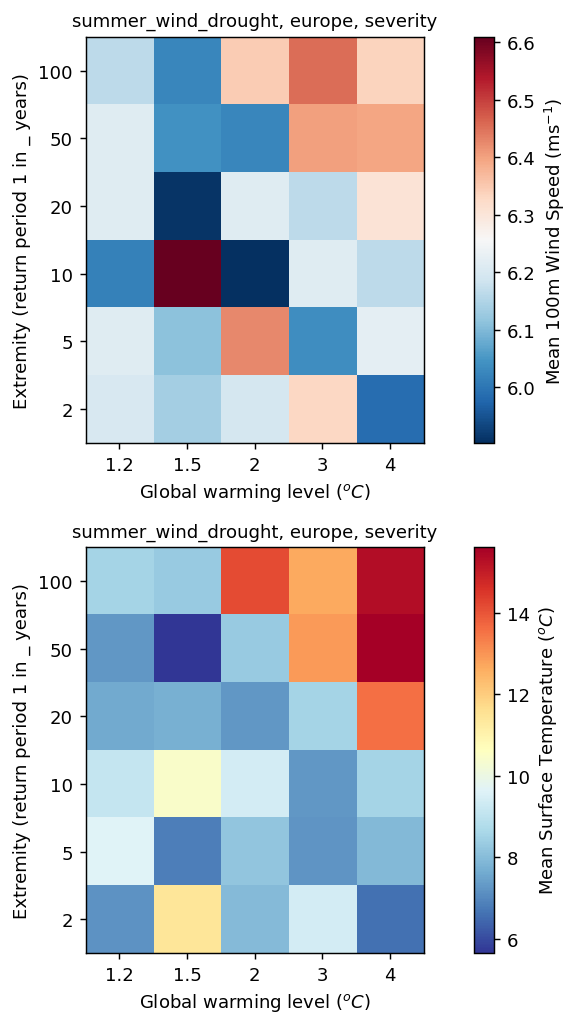

In [157]:

def extr_gwl_plot(Polish_Wind_Farms):
    ''' The purpose of this function is ....'''

    plt.rcParams["font.size"] = 10
    fig, ax = plt.subplots(2,1,figsize=(8,8), facecolor='w', dpi=130)

    wind_temp = [[], []]

    xlabels, ylabels, cmaps, var_names = [],[],[],[]

    for event in Events_list:
        title = event.get_event_details()
        #print([val for val in title.values()])
        #print(type(title.keys()))
        
        ylabel = "{}".format(title["Extremity"])
        ylabels.append(ylabel)
        xlabel = "{}".format(title["Global Warming Level"])
        xlabels.append(xlabel)
        
        for idx, weather_var in enumerate(event.weather_vars[0:2]): 
            
            var_details = weather_var.get_attributes()
            cmaps.append(var_details["Color map"])
            var_names.append(var_details["Name"] + " " + var_details["Units"])
            allfarms = []

            for wind_farm in Polish_Wind_Farms:

                lat,lon,turb_no = Polish_Wind_Farms[wind_farm]
                lat_idx, lon_idx, lat, lon = weather_var.find_location(lat, lon, printLoc=False)
                allfarms.append(weather_var.var_data[:,lat_idx, lon_idx].mean())

            wind_temp[idx].append(np.array(allfarms).mean(axis=0))
            #print(np.array(allfarms).mean(axis=0))
    
    
    for i, var in enumerate(wind_temp[0:2]):
        var = np.array(var)
        im = ax[i].imshow(var.reshape(6,5), extent=[0, 5 , 0 , 6], cmap=cmaps[i], origin='lower')
        ax[i].set_ylabel("Extremity (return period 1 in _ years)")
        ax[i].set_xlabel("Global warming level ($^{o}C$)")
        ax[i].set_yticks(np.arange(0.5,6,1))
        ax[i].set_xticks(np.arange(0.5,5,1))
        ax[i].set_yticklabels([str(e) for e in extr_order])
        ax[i].set_xticklabels([str(w) for w in gwl_order])
        ax[i].set_title("{}, {}, {}".format(title["Event type"], title["Location"], title["Duration/Severity"]), fontsize=10)
        cb = plt.colorbar(im, ax=ax[i], label= "Mean " +var_names[i])
    
    plt.tight_layout()
    plt.show()

extr_gwl_plot(Polish_Wind_Farms)


### The plots above... 

### The function below compares the power generated in the different events ...

In [165]:
def compare_events_powers(Polish_Wind_Farms):

    plt.rcParams["font.size"] = 14

    for event in Events_list:
        title = event.get_event_details()
        print([val for val in title.values()])  # to identify which event

        wind_powers = []
        xlabels, ylabels, units, clrs = [],[],[],[] 

        wind = event.weather_vars[0]  

        for wind_farm in Polish_Wind_Farms:

            print(wind_farm)

            lat,lon,turb_no = Polish_Wind_Farms[wind_farm]                 
            date_conv, wind_speeds, lat, lon = wind.get_var_time_data(lat, lon, printLoc=False)
            
            farm_power = turb_no * WindTurbine().wind_power(wind_speeds.flatten())
            wind_powers.append(farm_power)  # convert wind speed to power

        
        # quick way to add power labels before ssr labels
        ylabels.insert(2, 'Power generated in MW') 
        clrs.insert(2, 'teal')
        units.insert(2, 'MW')
        
        print(np.array(wind_powers).shape)
        
        break
        
        bins = np.linspace(0, 2000, 11)
        hist = ax[3].hist(wind_powers, bins=bins, color='teal', rwidth=0.95)
        ax[3].set_xlabel(ylabels[2])
        ax[3].set_ylabel('Day counts')         
        ax[3].grid(axis='y',linestyle='--',alpha=0.7)
        ax[3].set_xticks(bins)
        counts = hist[0]
        percentages = counts/np.sum(counts) *100

        wind_powers = (np.array(wind_powers).sum(axis=0))/1e6  # wind power sum across Polish Wind farms, in MW
        drought = np.min(wind_powers)
        drought_idx = np.where(wind_powers==drought)[0][0]
        drought_date = date_conv[drought_idx]
 

#             ax[0].set_title("{}, {}, {} \n {}, {}, {}".format(title["Event type"], title["Location"], 
#                                                 title["Extremity"], title["Duration/Severity"],
#                                                 title["Global Warming Level"], title["Event no."]))


        for i in range(len(bins)-1):
            patch = hist[2].patches[i]
            ax[3].annotate('{:.2f} %'.format(percentages[i]), (patch.get_x() + patch.get_width()/2, patch.get_height()), 
                           fontsize=14, ha='center', va='bottom')

        plt.show()

compare_events_powers(Polish_Wind_Farms)

['summer_wind_drought', 'europe', 'return_period_1_in_2_years', 'severity', 'gwl12degC', 'event1']
Zary
Nowy
Lubiewo
Zarki
Gasawa
Grabina
Zarnowiec
Suszec
Laziska
Paslek
Mszczonow
Mstow
Zoludowo
(13, 365)


### maybe average these values for each extremity / gwl and compare
### also maybe find a metric which combines temp with wind power?

In [ ]:
def compare_events_powers(Polish_Wind_Farms):

    plt.rcParams["font.size"] = 14

    for event in Events_list:
        title = event.get_event_details()
        print([val for val in title.values()])  # to identify which event

        all_snap_data = [[], [], []]
        wind_powers = []
        xlabels, ylabels, units, clrs = [],[],[],[] 

        fig, ax = plt.subplots(4,1,figsize=(15,30), facecolor='w', dpi=130)

        for idx, weather_var in enumerate(event.weather_vars): 

            ylabel = weather_var.name +' '+ weather_var.units
            ylabels.append(ylabel)
            units.append(weather_var.units[1:-1])
            clrs.append(weather_var.clr)

            for wind_farm in Polish_Wind_Farms:

                lat,lon,turb_no = Polish_Wind_Farms[wind_farm]                 
                date_conv, var_data, lat, lon = weather_var.get_var_time_data(lat, lon, printLoc=False)
                all_snap_data[idx].append(var_data.flatten())

                if weather_var.var=='wind_speed':  # for wind only
                    wind_powers.append(turb_no * WindTurbine().wind_power(var_data.flatten()))  # convert to power


        # quick way to add power labels before ssr labels
        ylabels.insert(2, 'Power generated in MW') 
        clrs.insert(2, 'teal')
        units.insert(2, 'MW')

        wind_powers = (np.array(wind_powers).sum(axis=0))/1e6  # wind power sum across Polish Wind farms, in MW
        drought = np.min(wind_powers)
        drought_idx = np.where(wind_powers==drought)[0][0]
        drought_date = date_conv[drought_idx]

        avg_temps = np.array(all_snap_data[1]).mean(axis=0)
        hottest = np.max(avg_temps)
        hottest_idx = np.where(avg_temps==hottest)[0][0]
        hottest_day = date_conv[hottest_idx]

        for i, snap_data in enumerate(all_snap_data[0:2] + [wind_powers]):

            snap_data = np.array(snap_data)
            if i==0 : allfarms = snap_data.mean(axis=0)     # average wind speed across Polish Wind farms
            elif i==1 : allfarms = snap_data.mean(axis=0)   # average surface temp across Polish Wind farms
            elif i==2 : allfarms = snap_data          # wind power sum across Polish Wind farms, in MW

            ax[i].axvline(drought_date, c='m', linestyle='dashed', label='Wind drought on {}: {:.2f} {}'.format(
                drought_date, allfarms[drought_idx], units[i]))
            ax[i].axvline(hottest_day, c='r', linestyle='dashed', label='Hottest day on {}: {:.2f} {}'.format(
                hottest_day, allfarms[hottest_idx], units[i]))
            ax[i].legend(loc=2)

            ax[i].plot(date_conv, allfarms, c=clrs[i])
            ax[i].set_ylabel(ylabels[i]) 
            ax[i].set_xlabel('Date') 
            ax[i].grid(axis='y',linestyle='--',alpha=0.9)    

            ax[0].set_title("{}, {}, {} \n {}, {}, {}".format(title["Event type"], title["Location"], 
                                                title["Extremity"], title["Duration/Severity"],
                                                title["Global Warming Level"], title["Event no."]))


        bins = np.linspace(0, 2000, 11)
        hist = ax[3].hist(wind_powers, bins=bins, color='teal', rwidth=0.95)
        ax[3].set_xlabel(ylabels[2])
        ax[3].set_ylabel('Day counts')         
        ax[3].grid(axis='y',linestyle='--',alpha=0.7)
        ax[3].set_xticks(bins)
        counts = hist[0]
        percentages = counts/np.sum(counts) *100

        for i in range(len(bins)-1):
            patch = hist[2].patches[i]
            ax[3].annotate('{:.2f} %'.format(percentages[i]), (patch.get_x() + patch.get_width()/2, patch.get_height()), 
                           fontsize=14, ha='center', va='bottom')

        plt.show()

compare_events_powers(Polish_Wind_Farms)